In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import warnings
from Bio.Data import IUPACData
from matplotlib import animation
import pdb
warnings.filterwarnings('ignore')

def getpositions(x,y): 
    s = PDBParser().get_structure(x,y)
    name=np.array([(atom.get_name())[0] for chains in s for chain in chains for residue in chain for atom in residue])
    position = np.array([atom.get_coord() for chains in s for chain in chains for residue in chain for atom in residue])
    mass=np.array([IUPACData.atom_weights[name[i].capitalize()] for i in range(len(name))])
    return position, name, mass

def Verlet(F,coord,dt):
    N = np.shape(F)[0]
    coord[1] = coord[0] + (F[0]*dt**2)/2
    for i in range(1,N-1):
        coord[i+1] = 2*coord[i] - coord[i-1] + F[i]*dt**2
    return coord

def LeapFrog(F,coord,vel,dt):
    N = np.shape(F)[0]
    for i in range(N-1):
        vel[i + 1] = vel[i] - coord[i]/dt + F[i]*dt
        coord[i + 1] = coord[i] + vel[i + 1]*dt
    return coord,vel

In [2]:
def Solve_system_Verlet(molecula,moleculapdb,dt,tmax):
    #Informacion del pdb
    positions, name, mass = getpositions(molecula, moleculapdb)

    # Número de partículas
    n = len(name)
    
    #avogadro = 6.023e23   #Numero de avogadro
    #mass = mass*(1e-3/avogadro)  #Ajuste a la masa para ponerla en kg
    #positions = positions*1e-10   #Ajuste a las posiciones para ponerlas en metros
    
    # Arreglo de tiempo
    t0 = np.arange(0, tmax, dt)
    
    # Posiciones iniciales
    posx = np.zeros((len(t0),n))
    posx[0,:] = positions[:,0]
    
    posy = np.zeros((len(t0),n))
    posy[0,:] = positions[:,1]
    
    posz = np.zeros((len(t0),n))
    posz[0,:] = positions[:,2]
   
    # Aceleraciones aleatorias
    ax = np.random.uniform(-10,10,(len(t0), n))
    ay = np.random.uniform(-10,10,(len(t0), n))
    az = np.random.uniform(-10,10,(len(t0), n))
    
    # Agregar efecto de la masa sobre la aceleración de cada partícula
    for i in range(n):
        ax[:,i]=ax[:,i]/mass[i]
        ay[:,i]=ay[:,i]/mass[i]
        az[:,i]=az[:,i]/mass[i]
    
    posx = Verlet(ax,posx,dt)
    posy = Verlet(ay,posy,dt)
    posz = Verlet(az,posz,dt)

    #Graficar resultados de las posiciones
    fig=plt.figure(figsize=(10,10))
    plt.subplot(3,2,1)
    plt.title('x vs t')
    plt.plot(t0,posx[:,:])
    plt.subplot(3,2,2)
    plt.title('y vs t')
    plt.plot(t0,posy[:,:])
    plt.subplot(3,2,3)
    plt.title('z vs t')
    plt.plot(t0,posz[:,:])
    plt.subplot(3,2,4)
    plt.title('x vs y')
    plt.plot(posx[:,:],posy[:,:])
    plt.subplot(3,2,5)
    plt.title('y vs z')
    plt.plot(posy[:,:],posz[:,:])
    plt.subplot(3,2,6)
    plt.title('x vs z')
    plt.plot(posx[:,:],posz[:,:])
    plt.show()
    return

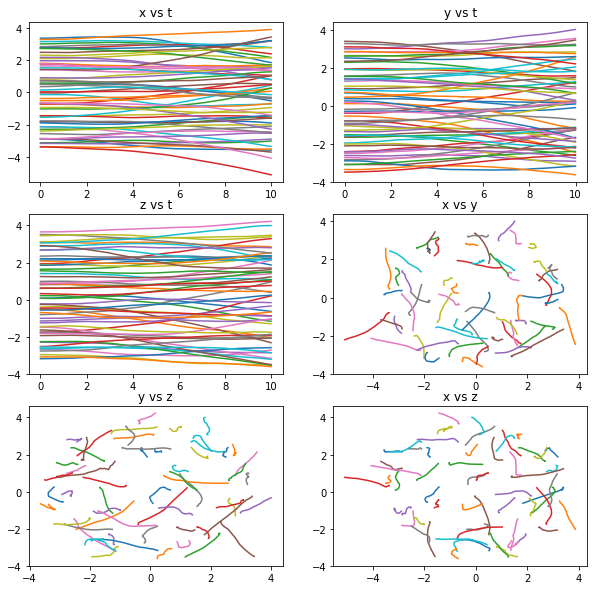

In [3]:
Solve_system_Verlet("c60", "c60.pdb",0.01,10)

In [4]:
def Solve_system_LeapFrog(molecula,moleculapdb,dt,tmax):
    
    positions, name, mass = getpositions(molecula, moleculapdb)

    # Número de partículas
    n=len(name)
    
    #Numero de avogadro
    avogadro=6.023e23
    #Ajuste a la masa para ponerla en kg
    mass=mass*(1e-3/avogadro)
    
    #Ajuste a las posiciones para ponerlas en metros
    positions=positions*1e-10
    
    # Arreglo de tiempo
    t0 = np.arange(0, tmax, dt)
    # Posiciones iniciales
    posx=np.zeros((len(t0),n))
    posx[0,:]=positions[:,0]
    posy=np.zeros((len(t0),n))
    posy[0,:]=positions[:,1]
    posz=np.zeros((len(t0),n))
    posz[0,:]=positions[:,2]

    # Velocidad inicial=0
    velx = np.zeros((len(t0),n))
    vely = np.zeros((len(t0),n))
    velz = np.zeros((len(t0),n))
    
    # Aceleraciones aleatorias
    ax = np.random.uniform(-10,10,(len(t0), n))
    ay = np.random.uniform(-10,10,(len(t0), n))
    az = np.random.uniform(-10,10,(len(t0), n))
    # Agregar efecto de la masa sobre la aceleración de cada partícula
    for i in range(n):
        ax[:,i]=ax[:,i]/mass[i]
        ay[:,i]=ay[:,i]/mass[i]
        az[:,i]=az[:,i]/mass[i]
        
    posx, velx=LeapFrog(ax, posx, velx, dt)
    posy, vely=LeapFrog(ay, posy, vely, dt)
    posz, velz=LeapFrog(az, posz, velz, dt)
    
    #Graficar resultados de las posiciones
    fig=plt.figure(figsize=(10,10))
    plt.subplot(3,3,1)
    plt.title('x vs t')
    plt.plot(t0,posx[:,:])
    plt.subplot(3,3,2)
    plt.title('y vs t')
    plt.plot(t0,posy[:,:])
    plt.subplot(3,3,3)
    plt.title('z vs t')
    plt.plot(t0,posz[:,:])
    plt.subplot(3,3,4)
    plt.title('vx vs t')
    plt.plot(t0,velx[:,:])
    plt.subplot(3,3,5)
    plt.title('vy vs t')
    plt.plot(t0,vely[:,:])
    plt.subplot(3,3,6)
    plt.title('vz vs t')
    plt.plot(t0,velz[:,:])
    plt.subplot(3,3,7)
    plt.title('x vs y')
    plt.plot(posx[:,:],posy[:,:])
    plt.subplot(3,3,8)
    plt.title('y vs z')
    plt.plot(posy[:,:],posz[:,:])
    plt.subplot(3,3,9)
    plt.title('x vs z')
    plt.plot(posx[:,:],posz[:,:])
    plt.show()
    return

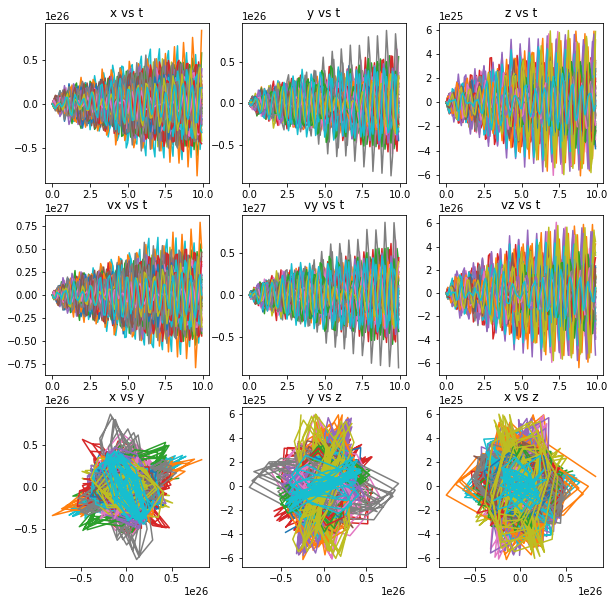

In [5]:
Solve_system_LeapFrog("c60", "c60.pdb",0.1,10)